In [1]:
# General Includes
import subprocess, json,os
from tqdm import tqdm
from IPython.display import clear_output,display
import time
from pathlib import Path
import random
from datetime import datetime

In [2]:
def shell(cmd,debug=False,returns_POpen = False,close_fds=False):
    if debug: print(cmd)
    
    if returns_POpen:
        process = subprocess.Popen(cmd, close_fds=close_fds)
        return process
    
    process = subprocess.run(cmd, stdout=subprocess.PIPE)
    return process.stdout.decode('utf-8').strip().splitlines()


def adb(cmd,debug = False,returns_POpen = False,close_fds=False):
    # This function runs adb commands on your connected device or emulator.
    if type(cmd) == str:
        cmd = cmd.split(' ')
    cmd = ['adb'] + cmd
    return shell(
        cmd,
        debug=debug,
        returns_POpen=returns_POpen,
        close_fds=close_fds
    )
adb('wait-for-device')

[]

In [3]:
def FindColor(im,color,tolerence):
    min_r = color[0]-tolerence
    min_g = color[1]-tolerence
    min_b = color[2]-tolerence

    max_r = color[0]+tolerence
    max_g = color[1]+tolerence
    max_b = color[2]+tolerence

    for x in range(1,im.width-1,1):
        for y in range(1,im.height-1,1):
            rgb = im.getpixel((x,y))
            if (rgb[0] > min_r and rgb[0] < max_r and
                rgb[1] > min_g and rgb[1] < max_g and
                rgb[2] > min_b and rgb[2] < max_b
               ):
                yield(x,y)

In [4]:
from PIL import Image, ImageDraw
def pullImage(resize_ratio=None):
    adb('shell screencap -p /sdcard/screen.png')
    adb('pull /sdcard/screen.png ./game.png')
    adb("shell rm /sdcard/screen.png")
    im = Image.open("game.png")
    im = im.convert('RGB')
    if resize_ratio is not None:
        im = im.resize((int(im.width*resize_ratio),int(im.height*resize_ratio)), Image.Resampling.LANCZOS)
    return im

In [5]:
def getCenter(points,area_range=5):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    return (int(sum(x) / len(points))+random.randint(0-area_range,area_range), int(sum(y) / len(points))+random.randint(0-area_range,area_range))

In [6]:
last_click = time.time()
resize_ratio=0.25
can_click = True

In [7]:
#theifing
silk = (173,133,153)
silk_t=10

pie = (228,208,122)
pie_t = 10

furs = (177,136,3)
furs_t = 45

cabbage = (169,201,73)
cabbage_t=35

master_farmer = (64,80,53)
master_farmer_t=2

tomato = (153,0,0)
tomato_t=50

In [8]:
#hunting
bird_trap = (196,91,58)
bird_trap_t = 15

In [9]:
def basicClick(center):
    adb(f"shell input tap {center[0]} {center[1]}")

In [10]:
color = tomato
threshold = tomato_t
action = basicClick

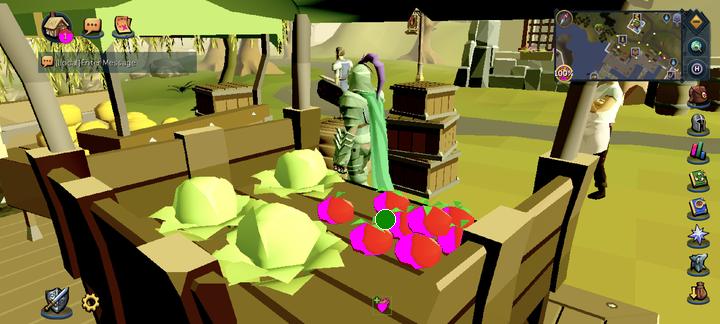

In [11]:
a = pullImage(resize_ratio = 0.3)
draw = ImageDraw.Draw(a)
found_pix_list= list(FindColor(a,color,threshold))
#print(found_pix_list)
if len(found_pix_list)>2:
    for p in found_pix_list:
        a.putpixel(p,(255, 0 ,255))
    
    center = getCenter(found_pix_list)
    draw.ellipse((center[0]-10,center[1]-10,center[0]+10,center[1]+10), fill=(12, 137, 0), outline=(255, 255, 255))
display(a)

In [ ]:
runs = 35
min_delay = 3
click_throttle = 5
random_delay = [2.5,3,2,1]
if click_throttle < min(random_delay) + min_delay:
    print("Your setup has a min delay that is too short")
while runs>0:
    runs-=1
    a = pullImage()
    #clear_output()
    #draw = ImageDraw.Draw(a)
    found_pix_list= list(FindColor(a,color,threshold))
    #print(found_pix_list)
    if len(found_pix_list)>2:
        for p in found_pix_list:
            a.putpixel(p,(255, 0 ,0))
        center = getCenter(found_pix_list)
        if time.time()-last_click > click_throttle:
            last_click = time.time()
     #       draw.ellipse((center[0]-10,center[1]-10,center[0]+10,center[1]+10), fill=(255, 0, 0), outline=(255, 255, 255))
            print(runs, center, datetime.now())
            if can_click:
                action(center)
                time.sleep(random.choice(random_delay))
    

    #display(a)
    #print('sleep')
    time.sleep(min_delay)

33 (1288, 716) 2022-08-07 14:52:30.474696
32 (1278, 720) 2022-08-07 14:52:38.618917
31 (1283, 730) 2022-08-07 14:52:46.355019
30 (1274, 733) 2022-08-07 14:52:54.113752
29 (1299, 719) 2022-08-07 14:53:00.238654
28 (1275, 728) 2022-08-07 14:53:08.388945
27 (1280, 725) 2022-08-07 14:53:14.509259
